#### Load libraries

In [1]:
import pandas as pd
import numpy as np

from scripts.data_inspection import DataInspector, DataTypesInspectionStrategy, HeadInspectionStrategy, SummaryStatisticsInspectionStrategy
from scripts.preprocessing import PreProcessor, DataTypesConversionStrategy, SubstringReplacementStrategy, FullStringReplacementStrategy
from scripts.missing_values_analysis import SimpleMissingValuesAnalysis
from scripts.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from scripts.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis
from scripts.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#### Load data

In [2]:
# Load the raw data

data_path = '../data/master_features_data.csv'
df = pd.read_csv(data_path)

### PREPROCESSING

#### Step 1: Data Inspection

In [3]:
# Inspect data types
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_uuid                97 non-null     object 
 1   past_tx_count_company           97 non-null     int64  
 2   past_fraud_tx_company           97 non-null     int64  
 3   past_tx_fail_rate_company       97 non-null     float64
 4   time_since_last_tx_company      97 non-null     float64
 5   unusual_activity_score_company  97 non-null     float64
 6   past_tx_count_card              97 non-null     int64  
 7   past_fraud_tx_card              97 non-null     int64  
 8   past_tx_fail_rate_card          97 non-null     float64
 9   time_since_last_tx_card         97 non-null     float64
 10  unusual_activity_score_card     97 non-null     float64
 11  past_tx_count_user              97 non-null     int64  
 12  past_

In [4]:
# View first few rows of data
data_inspector.set_strategy(HeadInspectionStrategy())
data_inspector.execute_inspection(df)

                       transaction_uuid  past_tx_count_company  \
0  0c9e09bc-c866-410f-8e71-f811b6532e26                      0   
1  44eeac1c-1c76-4cc7-9dea-a71878d6b762                      0   
2  20d05d62-bfee-4f57-bdbc-dd81b88ab320                      0   
3  11e4ced5-ec20-458e-852c-979b86bc8ce8                      1   
4  54850c8a-c3c1-4b02-96a9-b79f258d86d7                      2   
5  0e3dae97-5214-4116-bb90-e8e124ef407f                      1   
6  46c3e288-84d7-4efe-952e-b9db0cbe040d                      2   
7  c5109d95-eb3a-4f04-9512-efc4fa34fc21                      3   
8  41cc13de-a195-4a65-a76f-200445a3d776                      0   
9  07f1423d-21bc-4932-8558-65209905df0d                      1   

   past_fraud_tx_company  past_tx_fail_rate_company  \
0                      0                   0.000000   
1                      0                   0.000000   
2                      0                   0.000000   
3                      0                   0.000000  

#### Step 2: Type Conversion

In [5]:
# Type cast each column to the appropriate data type
preprocessor = PreProcessor(DataTypesConversionStrategy(object, ['fradulent_user_flag', 'weekend_flag', 'past_fraud_tx_company', 'past_fraud_tx_user', 'past_fraud_tx_card', 'past_fraud_tx_vendor']))
df = preprocessor.execute(df)

In [6]:
# View data types post type conversion
data_inspector.set_strategy(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_uuid                97 non-null     object 
 1   past_tx_count_company           97 non-null     int64  
 2   past_fraud_tx_company           97 non-null     object 
 3   past_tx_fail_rate_company       97 non-null     float64
 4   time_since_last_tx_company      97 non-null     float64
 5   unusual_activity_score_company  97 non-null     float64
 6   past_tx_count_card              97 non-null     int64  
 7   past_fraud_tx_card              97 non-null     object 
 8   past_tx_fail_rate_card          97 non-null     float64
 9   time_since_last_tx_card         97 non-null     float64
 10  unusual_activity_score_card     97 non-null     float64
 11  past_tx_count_user              97 non-null     int64  
 12  past_

In [7]:
# Inspect summary statistics
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):


       past_tx_count_company  past_tx_fail_rate_company  \
count              97.000000                  97.000000   
mean                5.793814                   0.362671   
std                 6.593776                   0.325294   
min                 0.000000                   0.000000   
25%                 1.000000                   0.000000   
50%                 4.000000                   0.368421   
75%                 7.000000                   0.500000   
max                26.000000                   1.000000   

       time_since_last_tx_company  unusual_activity_score_company  \
count                   97.000000                       97.000000   
mean                    12.052971                       53.521295   
std                     33.837225                      112.430985   
min                      0.000000                        0.000000   
25%                      0.001389                        0.000000   
50%                      0.056944                     

### EXPLORATORY ANALYSIS

#### Step 1: Missing Values Assessment


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


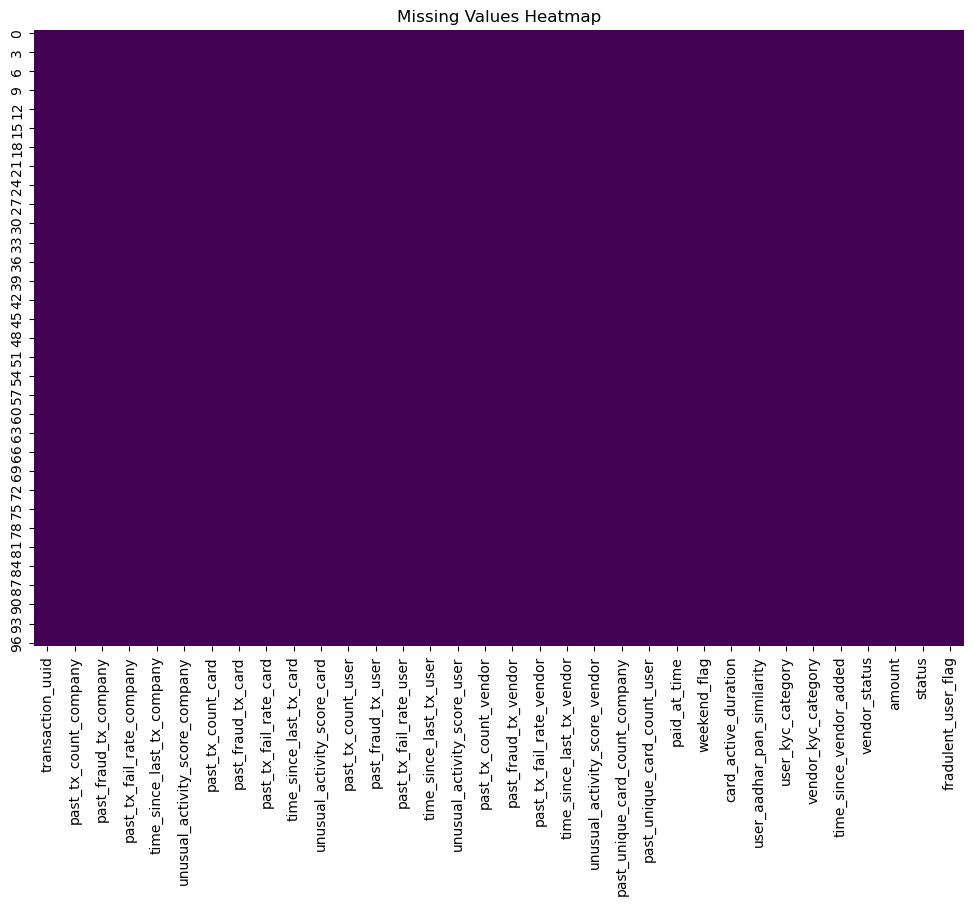

In [8]:
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

#### Step 2: Univariate Analysis

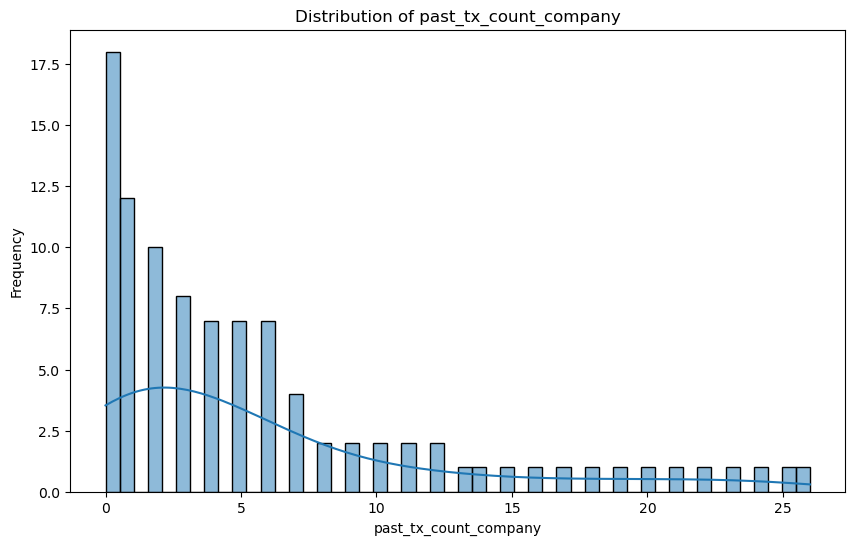

In [9]:
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'past_tx_count_company')

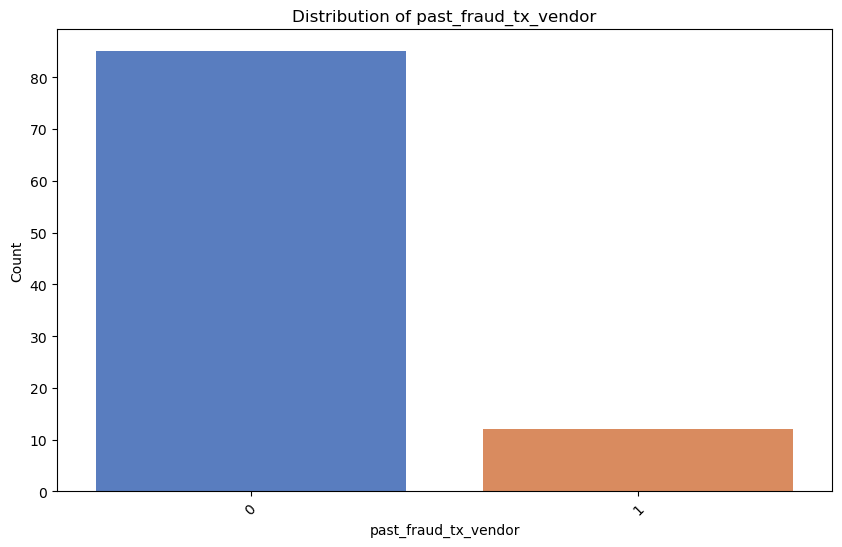

In [10]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'past_fraud_tx_vendor')


#### Step 3: Bivariate Analysis

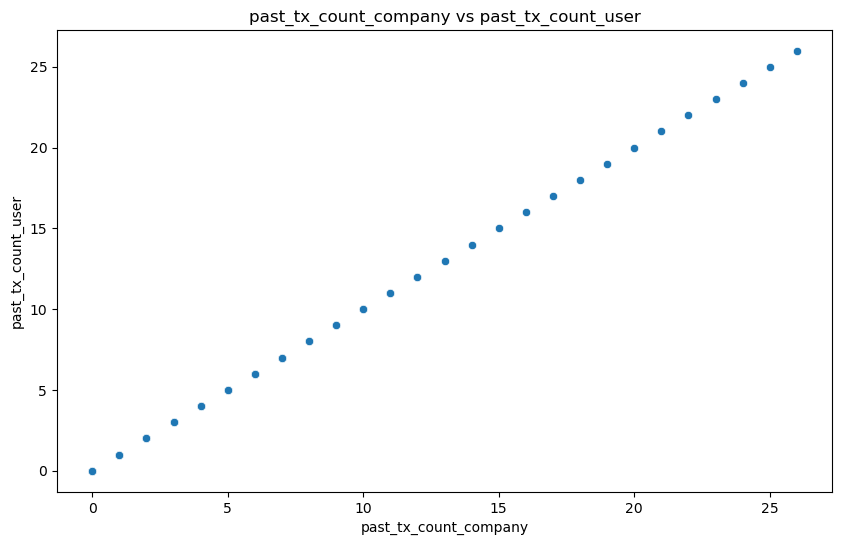

In [11]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'past_tx_count_company', 'past_tx_count_user')


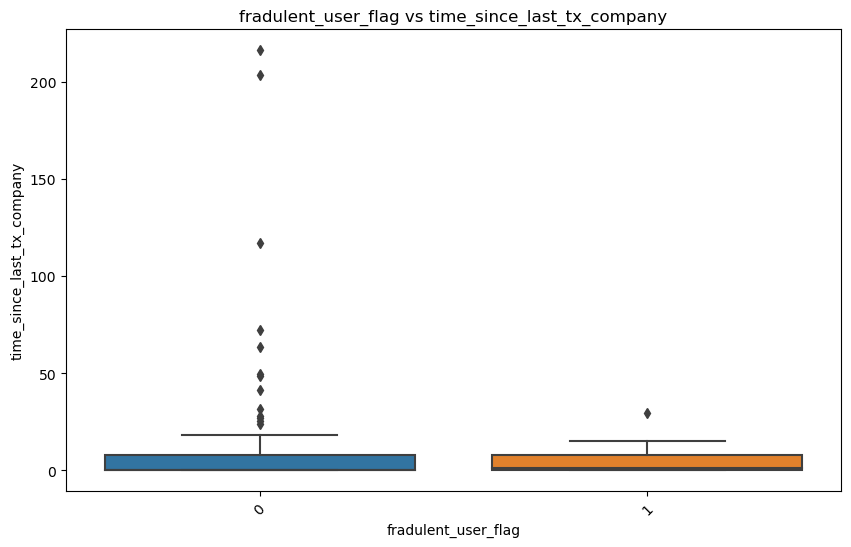

In [12]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'fradulent_user_flag', 'time_since_last_tx_company')

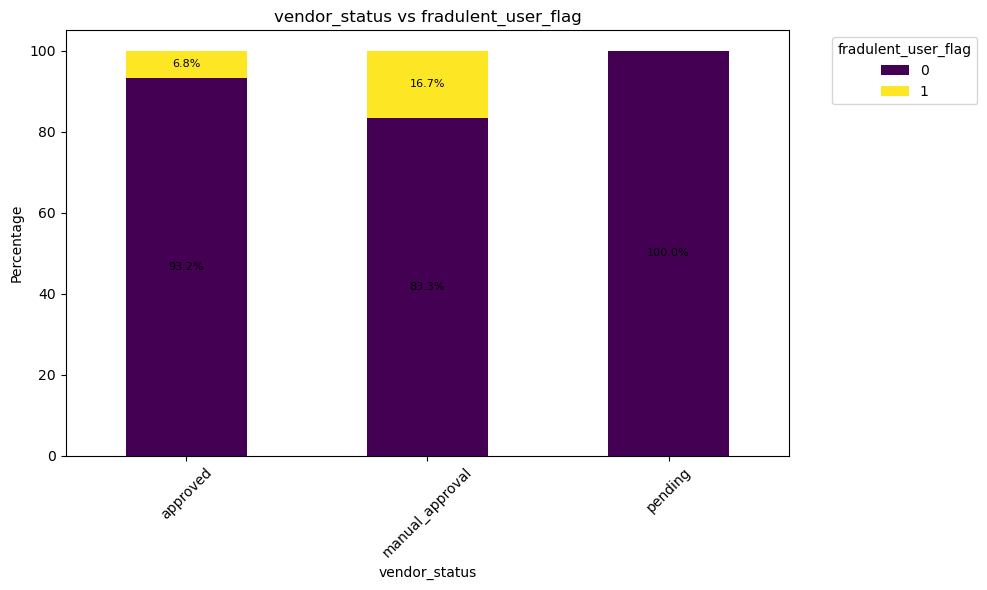

In [13]:
# Analyzing the relationship between two categorical features
bivariate_analyzer.set_strategy(CategoricalVsCategoricalAnalysis())
bivariate_analyzer.execute_analysis(df, 'vendor_status', 'fradulent_user_flag')

#### Step 4: Multivariate Analysis

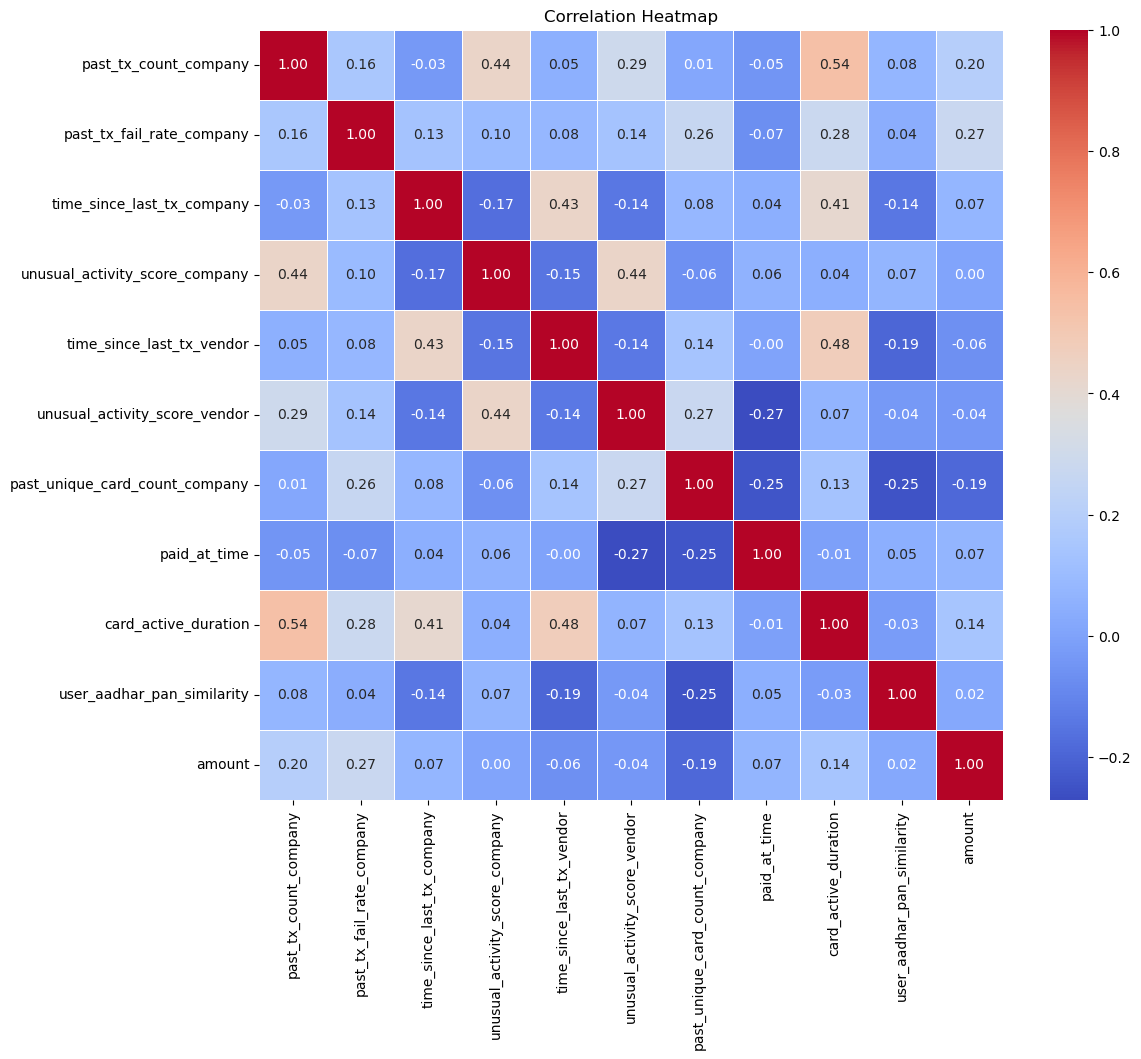

c:\Users\nanda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


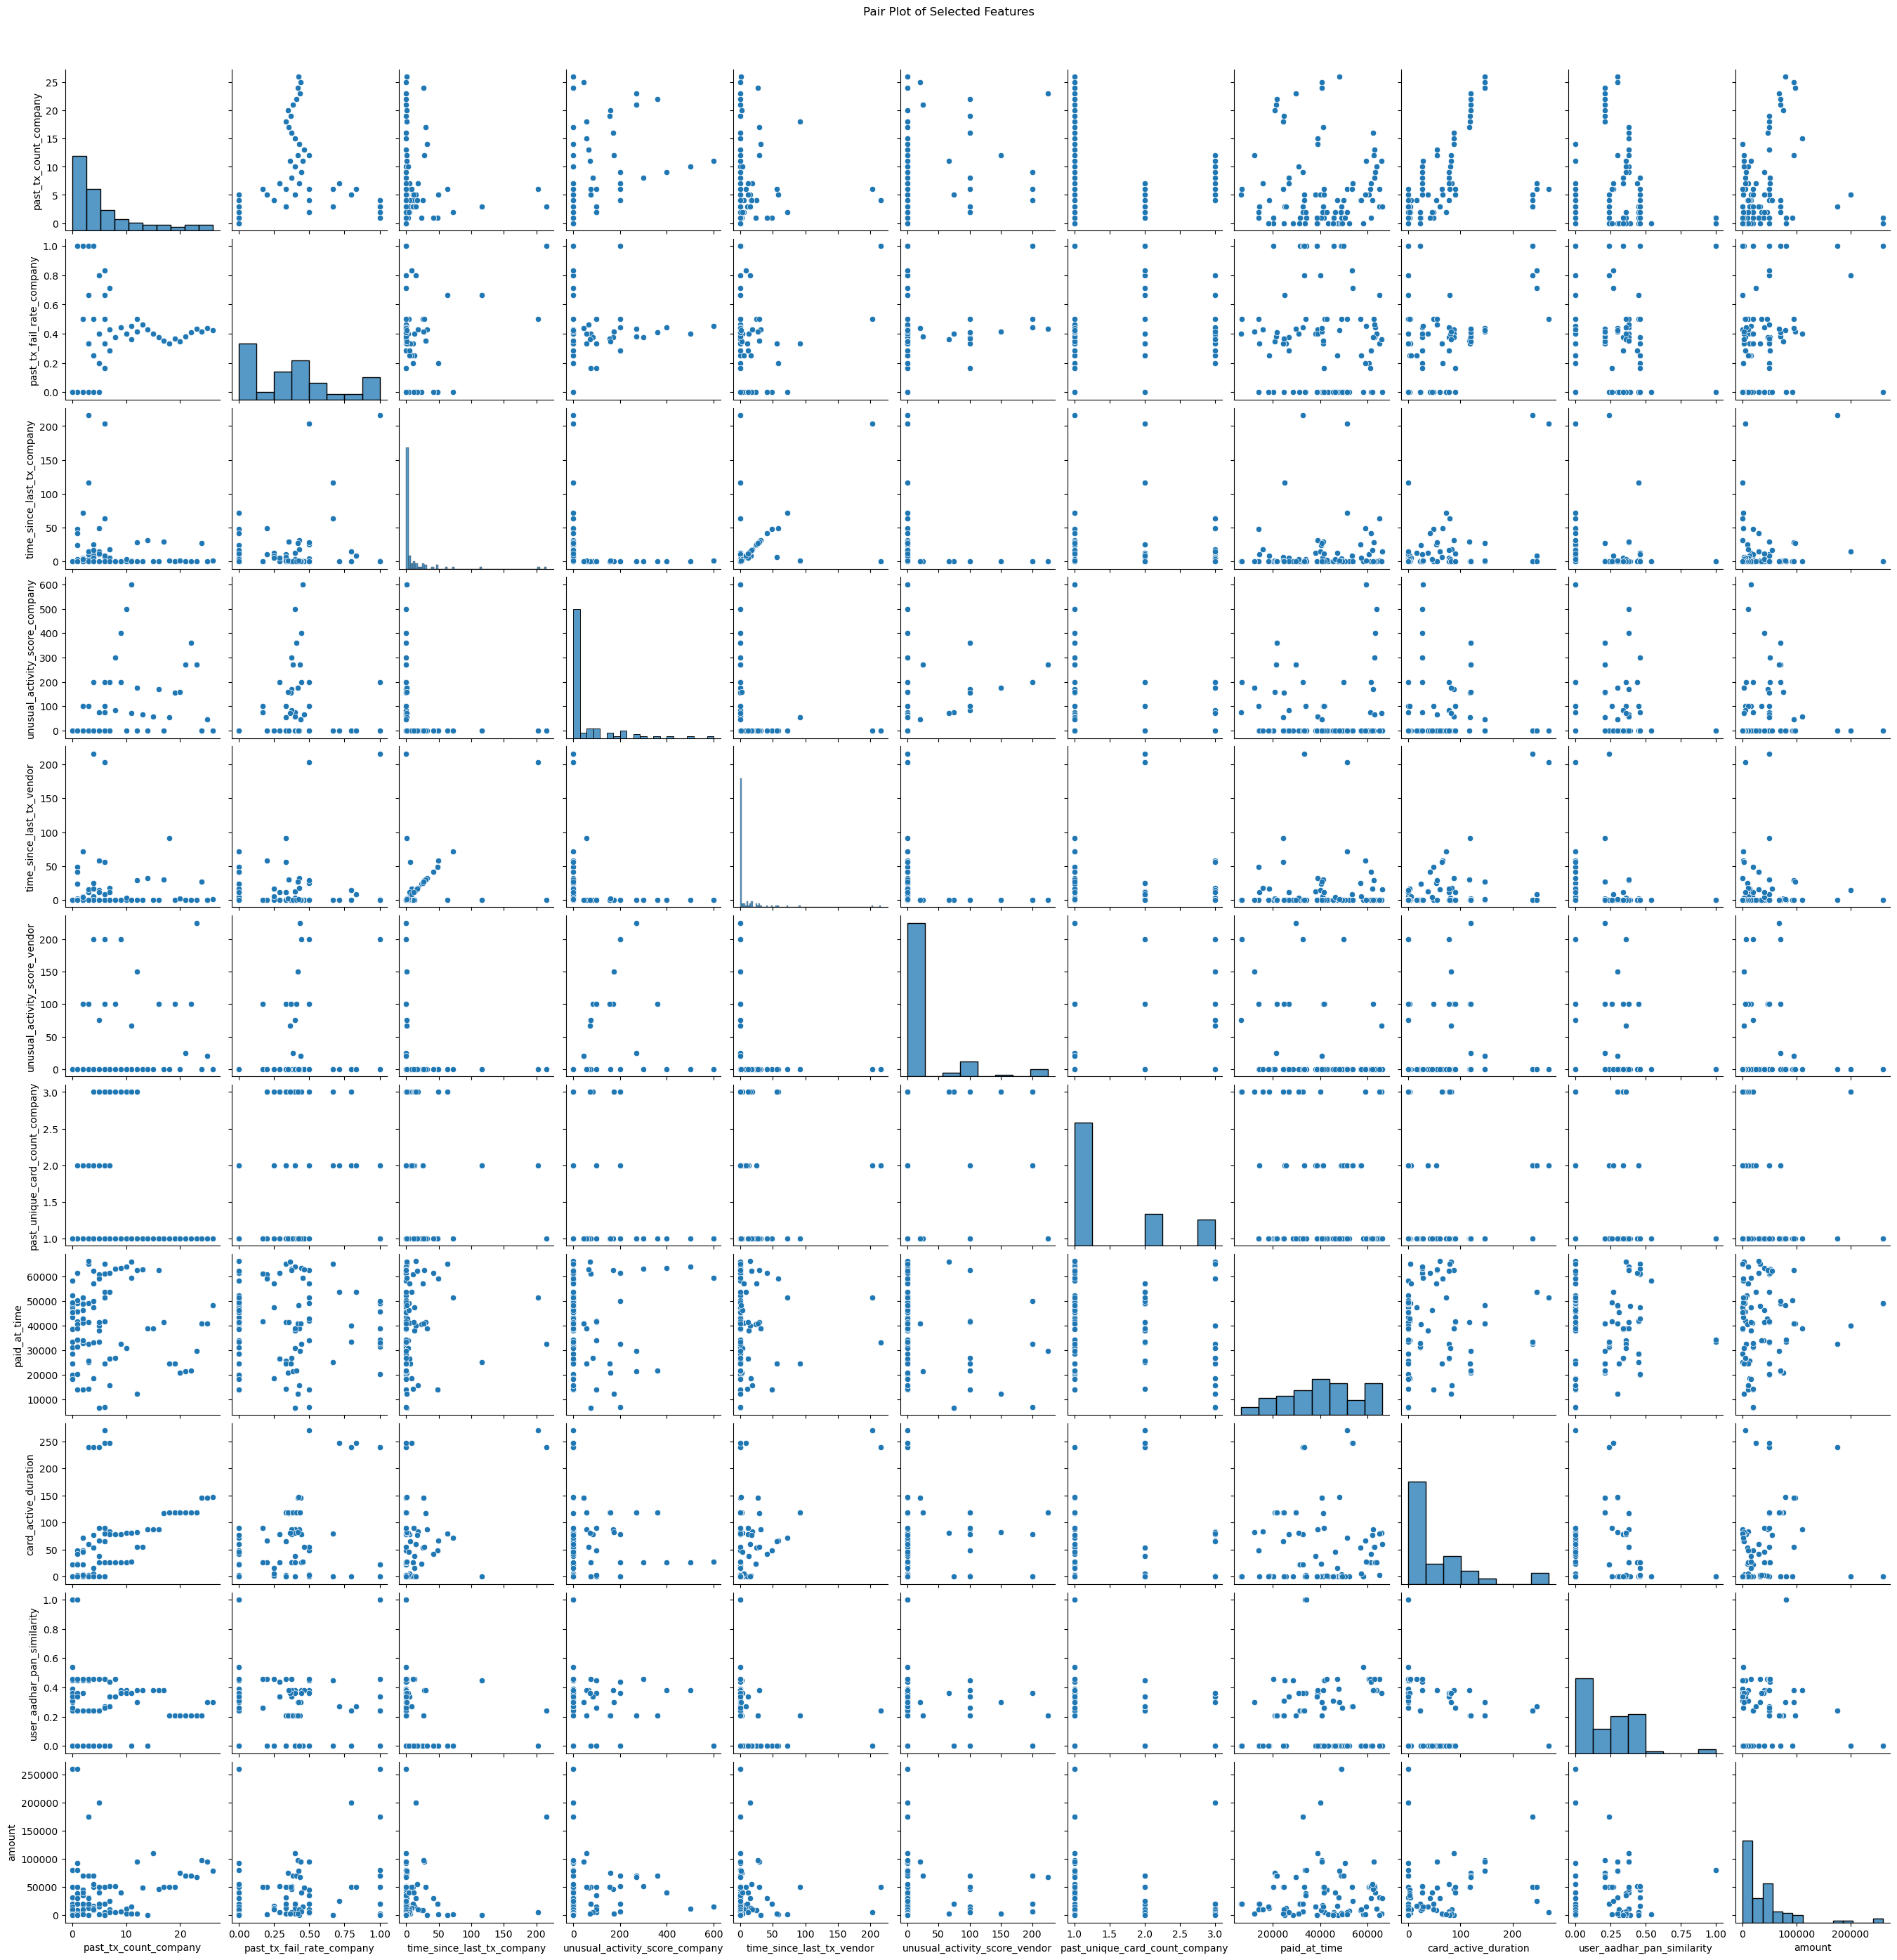

In [14]:

# Perform Multivariate Analysis

multivariate_analyzer = SimpleMultivariateAnalysis()

# Select numerical features for the analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [x for x in numerical_features if not x.endswith('_card') and not x.endswith('_user')]
numerical_features = [x for x in numerical_features if x not in ['past_tx_count_vendor', 'past_tx_fail_rate_vendor', 'time_since_vendor_added']]
selected_features = df[numerical_features]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)


### FEATURES SELECTION

#### Step 1: Evaluate features using feature selection techniques

In [15]:
data_path = '../data/selected_features_data.csv'
df = pd.read_csv(data_path)

In [16]:
# Type cast each column to the appropriate data type
preprocessor = PreProcessor(DataTypesConversionStrategy(object, ['fradulent_user_flag', 'weekend_flag', 'past_fraud_tx_company']))
df = preprocessor.execute(df)

In [17]:
df.dtypes

transaction_uuid                   object
past_tx_count_company               int64
past_tx_fail_rate_company         float64
time_since_last_tx_company        float64
unusual_activity_score_vendor     float64
past_unique_card_count_company      int64
paid_at_time                        int64
user_aadhar_pan_similarity        float64
amount                            float64
weekend_flag                       object
past_fraud_tx_company              object
status_settled                      int64
vendor_status_manual_pending        int64
user_gst_available                  int64
fradulent_user_flag                object
dtype: object

In [18]:
import os
import sys

home_directory = os.path.join(os.getcwd(), '..')
sys.path.append(home_directory)

In [19]:
from steps.scripts.features_selection import FeaturesSelector, MutualInformationStrategy, ANOVAFscoreStrategy, ChiSquareStrategy

In [20]:
X_numerical = df.select_dtypes(include=['int64', 'float64'])
X_categorical = df.select_dtypes(include=['object'])
X_categorical = X_categorical[[x for x in X_categorical.columns if x not in ['fradulent_user_flag', 'transaction_uuid']]]
y = df['fradulent_user_flag'].astype(int)

In [21]:
features_selector = FeaturesSelector(MutualInformationStrategy('numerical'))
features_selector.evaluate(X_numerical, y)

status_settled                    0.195879
past_tx_fail_rate_company         0.042685
paid_at_time                      0.027495
vendor_status_manual_pending      0.014949
user_aadhar_pan_similarity        0.010694
time_since_last_tx_company        0.005396
past_tx_count_company             0.000000
unusual_activity_score_vendor     0.000000
past_unique_card_count_company    0.000000
amount                            0.000000
user_gst_available                0.000000
dtype: float64

In [22]:
features_selector.set_strategy(ANOVAFscoreStrategy())
features_selector.evaluate(X_numerical, y)

past_tx_fail_rate_company         2.447670
past_tx_count_company             2.324122
user_aadhar_pan_similarity        1.788762
past_unique_card_count_company    0.869826
unusual_activity_score_vendor     0.708546
amount                            0.663700
status_settled                    0.491685
user_gst_available                0.280818
vendor_status_manual_pending      0.220609
time_since_last_tx_company        0.182556
paid_at_time                      0.001238
dtype: float64

In [23]:
features_selector.set_strategy(MutualInformationStrategy(X_type='categorical'))
features_selector.evaluate(X_categorical, y)

weekend_flag_1             0.005375
past_fraud_tx_company_1    0.005147
dtype: float64

In [24]:
features_selector.set_strategy(ChiSquareStrategy())
features_selector.evaluate(X_categorical, y)

weekend_flag             0.854349
past_fraud_tx_company    0.614997
dtype: float64

#### Step 2: Select features

The following numerical features score low on both methods and can be removed:
* card_active_duration
* unusual_activity_score_company
* time_since_last_tx_vendor

Among categorical features, 
* In vendor_status, it seems only important to check whether the vendor was manually approved or not. Manual approval and Pending can be combined into one category
* In user_kyc_category, it seems only important to check whether user GST is available or not. 
* vendor_kyc_category does not feature high in either approach and does not seem important as per EDA, so can be removed.

Selected numerical features:
* past_tx_count_company
* past_tx_fail_rate_company
* time_since_last_tx_company
* unusual_activity_score_vendor
* past_unique_card_count_company
* paid_at_time
* user_aadhar_pan_similarity
* amount

Selected categorical features:
* weekend_flag
* past_fraud_tx_company
* status_settled
* vendor_status_manual_pending
* user_gst_available